In [77]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from matplotlib import style
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import subprocess

In [78]:
symbols = ['TSLA','GOOG']
N = 20 # No of Days for which the report will be generated

#### Get Data for the last N days

In [79]:
def get_Nday_data(symbols,N):
    
    Nday_data = {}
    c = 0
    
    end = dt.datetime.now()  # TODAY
#     start = end + pd.Timedelta(days=-N) # N DAYS BACK
    start = end + timedelta(days=-N) # N DAYS BACK
    
    for symbol in symbols:
        Nday_data[symbol] = web.DataReader(symbol, 'yahoo', start, end)
        c += 1
        print('{}/{}'.format(c, len(symbols)))
    print('Success.')
    return Nday_data

In [ ]:
# subprocerss allows to run terminal commands through python
def push_to_cloud(file,cloud_folder):
    subprocess.run(['rclone','copy',file, f"remote:{cloud_folder}"],capture_output=True, text = True)
    print('Report pushed to the cloud')

In [83]:
def saveplots(title,file_format = 'png',cloud_folder = 'Stock Analysis'):
    filename = f"/Users/srimukesshsubramanaian/Stock Report/{title}.{file_format}"
    fig.savefig(filename)
    push_to_cloud(filename,cloud_folder)   

1/1
Success.


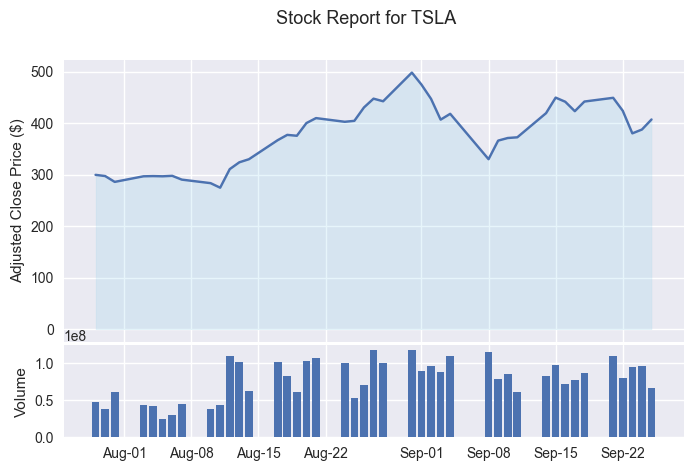

In [176]:
data_dict = get_Nday_data(symbols,N)
style.use('seaborn')

for symbol in symbols:
    
    fig = plt.figure(figsize=(8,5), dpi=100)

    #Add Global Title to the subplots
    title = f" Stock Report for {symbol}"
    fig.suptitle(title, fontsize=13)
    
    df = data_dict[symbol]
    
    ax1 = plt.subplot2grid((20,1), (0,0), rowspan=15, colspan=1)
    ax2 = plt.subplot2grid((20,1), (15,0), rowspan=5, colspan=1, sharex=ax1)
    
    ax1.fill_between(df.index, df['Adj Close'], color="skyblue", alpha=0.2) # Area Graph with Transparency
    ax1.plot(df.index, df['Adj Close'])
    ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
#     ax1.set_title(f" Stock Report for {symbols}")
    ax1.set_ylabel('Adjusted Close Price ($)')
    ax2.bar(df.index, df['Volume'])
    ax2.set_ylabel('Volume')
    
    # Setting X label major and minor
    date_form = DateFormatter("%b-%d")
    ax2.xaxis.set_major_formatter(date_form)
    
    # Ensure a major tick for each week using (interval=1) - 
#     ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

# Resources used for plots
#  https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/
#  https://python-graph-gallery.com/241-improve-area-chart/   
    saveplots(title)
    
    
    

1/1
Success.


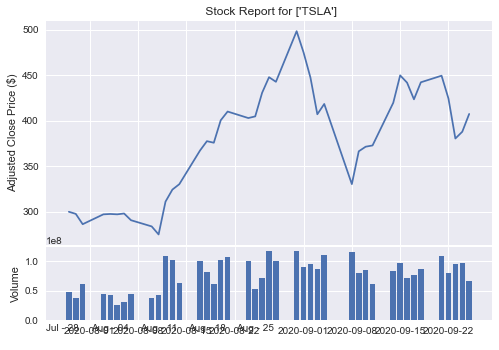

In [172]:
# from matplotlib.dates import DateFormatter
# from matplotlib.dates import mdates
import matplotlib.dates as dates


N =60
symbols = ['TSLA']
data_dict = get_Nday_data(symbols,N)

df = data_dict[symbols[0]]
style.use('seaborn')
ax1 = plt.subplot2grid((20,1), (0,0), rowspan=15, colspan=1)
ax2 = plt.subplot2grid((20,1), (15,0), rowspan=5, colspan=1, sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax2.bar(df.index, df['Volume'])
ax1.set_title(f" Stock Report for {symbols}")
ax1.tick_params(
    axis='x',          # changes apply to the x-axis for plot 1
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
ax1.set_ylabel('Adjusted Close Price ($)')
ax2.set_ylabel('Volume')


# tech 2
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%b - %d\n'))
ax2.xaxis.grid(True, which="minor")
ax2.yaxis.grid()
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n%b\n%Y'))

# Define the date format
# date_form = DateFormatter("%m-%d")
# ax2.xaxis.set_major_formatter(date_form)

1/1
Success.


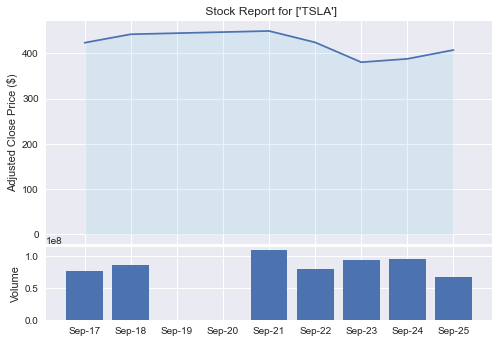

In [178]:
# from matplotlib.dates import DateFormatter
# from matplotlib.dates import mdates
import matplotlib.dates as dates


N =10
symbols = ['TSLA']
data_dict = get_Nday_data(symbols,N)

df = data_dict[symbols[0]]
style.use('seaborn')
ax1 = plt.subplot2grid((20,1), (0,0), rowspan=15, colspan=1)
ax2 = plt.subplot2grid((20,1), (15,0), rowspan=5, colspan=1, sharex=ax1)
ax1.fill_between(df.index, df['Adj Close'], color="skyblue", alpha=0.2)
ax1.plot(df.index, df['Adj Close'])
ax2.bar(df.index, df['Volume'])
ax1.set_title(f" Stock Report for {symbols}")
ax1.tick_params(
    axis='x',          # changes apply to the x-axis for plot 1
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
ax1.set_ylabel('Adjusted Close Price ($)')
ax2.set_ylabel('Volume')


# ax1.fill_between( df.index, df['Adj Close'], color="skyblue", alpha=0.4)
# plt.show()

# # tech 2
# ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
#                                                 interval=1))
# ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n'))
# ax2.xaxis.grid(True, which="minor")
# ax2.yaxis.grid()
# ax2.xaxis.set_major_locator(dates.MonthLocator())
# ax2.xaxis.set_major_formatter(dates.DateFormatter('\n%b\n%Y'))

# Define the date format
date_form = DateFormatter("%b-%d")
ax2.xaxis.set_major_formatter(date_form)
# Ensure a major tick for each week using (interval=1) 
# ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))